# Connecticut Dickey-Fuller Tests & Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore') 

In [4]:
topzip = pd.read_csv('topzip_timeseries.csv')
topzip

,time,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,AveragePrice,ROI,value
0,1996-04-01,60545,7030,Hoboken,NJ,New York,Hudson,58,9.577774e+05,5.148210,301600.0
1,1996-04-01,62022,11211,New York,NY,New York,Kings,118,5.951672e+05,11.189940,133200.0
2,1996-04-01,60639,7302,Jersey City,NJ,New York,Hudson,192,5.965913e+05,9.403061,137200.0
3,1996-04-01,62027,11216,New York,NY,New York,Kings,476,5.721717e+05,9.942505,146100.0
4,1996-04-01,62033,11222,New York,NY,New York,Kings,1156,6.400475e+05,10.535523,149200.0
...,...,...,...,...,...,...,...,...,...,...,...
2380,2018-04-01,62033,11222,New York,NY,New York,Kings,1156,6.400475e+05,10.535523,1721100.0
2381,2018-04-01,60461,6820,Darien,CT,Stamford,Fairfield,6037,1.128920e+06,1.514218,1388100.0
2382,2018-04-01,60796,7756,Neptune,NJ,New York,Monmouth,9759,3.456445e+05,4.418274,533700.0
2383,2018-04-01,60125,6068,Salisbury,CT,Torrington,Litchfield,13646,3.843411e+05,1.476514,474500.0


In [3]:
topzip['time'] = pd.to_datetime(topzip['time'])
topzip.set_index('time', inplace=True)

In [5]:
topzip.drop(columns=['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'AveragePrice', 'ROI'], inplace=True)

In [61]:
state_zips = [6820, 6068, 6793]

state = topzip[topzip['Zipcode'].isin(state_zips)]
state.set_index('time', inplace=True)
state.head()

,Zipcode,value
time,,
1996-04-01,6820,552100.0
1996-04-01,6068,191600.0
1996-04-01,6793,280800.0
1996-05-01,6820,553400.0
1996-05-01,6068,191900.0


## Dickey-Fuller Testing

### First Zipcode: 6820

In [62]:
first_zip = state[state['Zipcode'] == state_zips[0]]
first_zip.drop(columns=['Zipcode'], inplace=True)
first_zip.head()

,value
time,
1996-04-01,552100.0
1996-05-01,553400.0
1996-06-01,554800.0
1996-07-01,556000.0
1996-08-01,557000.0


In [63]:
roll_mean = first_zip.rolling(window=12, center=False).mean()
roll_std = first_zip.rolling(window=12, center=False).std()

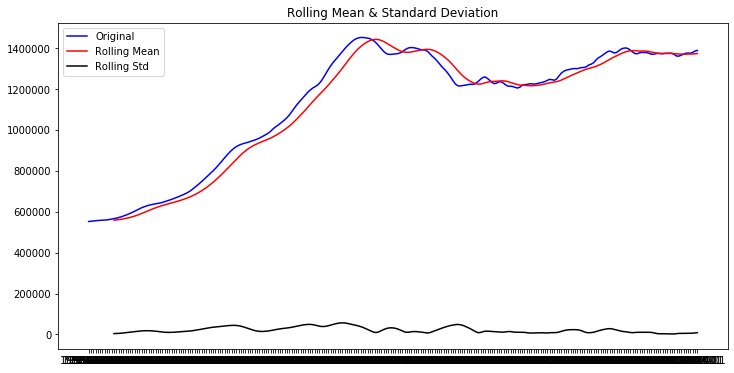

In [64]:
fig = plt.figure(figsize=(12,6))
plt.plot(first_zip.value, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [65]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(first_zip['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.21629346214937967
Fail to reject the null hypothesis. Data is not stationary.



In [66]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -2.172724
p-value                          0.216293
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [67]:
one_diff_first = first_zip['value'].diff().dropna()

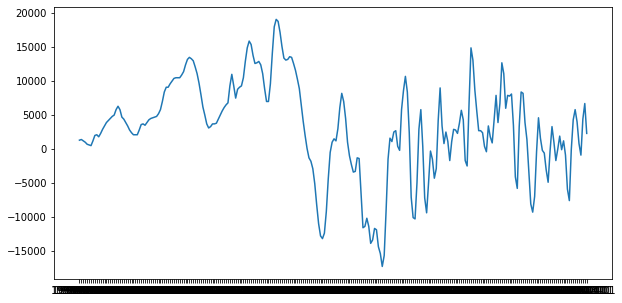

In [68]:
plt.figure(figsize=(10,5))
plt.plot(one_diff_first);

In [69]:
dftest = adfuller(one_diff_first)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.16860903977569947
Fail to reject the null hypothesis. Data is not stationary.



In [70]:
two_diff_first = one_diff_first.diff().dropna()

In [71]:
dftest = adfuller(two_diff_first)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 6.683827826659577e-07
Reject the null hypothesis. Data is stationary.



In [72]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -5.728519e+00
p-value                        6.683828e-07
#Lags Used                     1.600000e+01
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


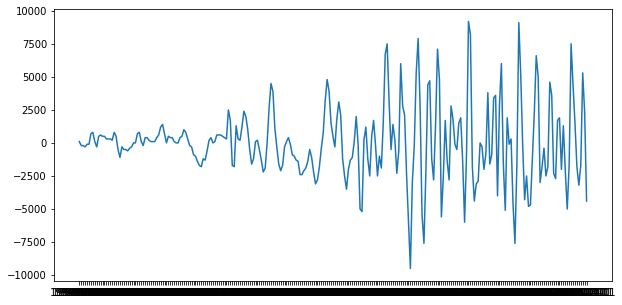

In [73]:
plt.figure(figsize=(10,5))
plt.plot(two_diff_first);

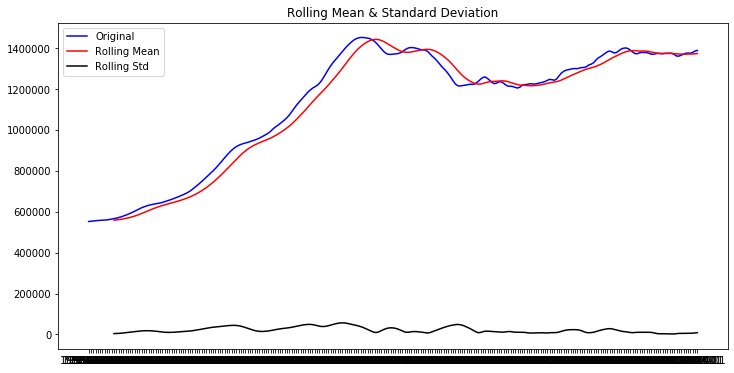

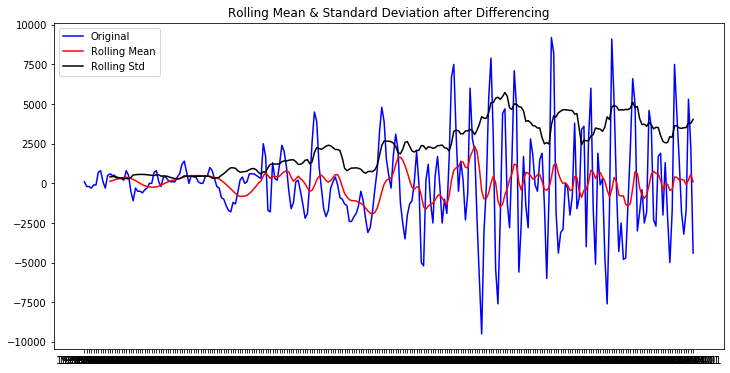

In [74]:
fig = plt.figure(figsize=(12,6))
plt.plot(first_zip.value, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

diff_roll_mean = two_diff_first.rolling(window=12, center=False).mean()
diff_roll_std = two_diff_first.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(two_diff_first, color='blue',label='Original')
plt.plot(diff_roll_mean, color='red', label='Rolling Mean')
plt.plot(diff_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after Differencing')
plt.show()

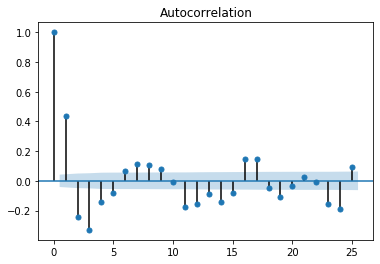

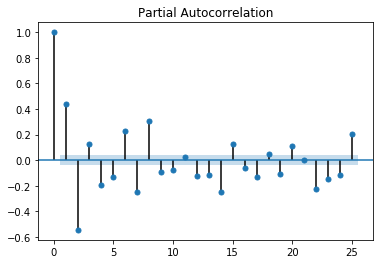

In [75]:
plot_acf(two_diff_first[:-1], alpha=0.5);
plot_pacf(two_diff_first[:-1], alpha=0.5);

### Second Zipcode: 6068

In [76]:
second_zip = state[state['Zipcode'] == state_zips[1]]
second_zip.drop(columns=['Zipcode'], inplace=True)
second_zip.head()

,value
time,
1996-04-01,191600.0
1996-05-01,191900.0
1996-06-01,192200.0
1996-07-01,192300.0
1996-08-01,192600.0


In [77]:
roll_mean = second_zip.rolling(window=12, center=False).mean()
roll_std = second_zip.rolling(window=12, center=False).std()

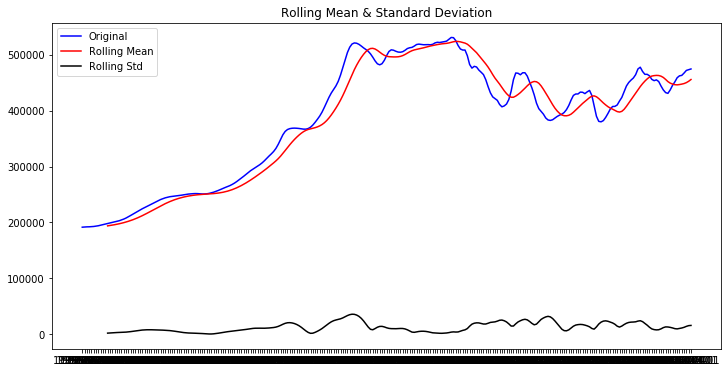

In [78]:
fig = plt.figure(figsize=(12,6))
plt.plot(second_zip.value, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [79]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(second_zip['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.3789496728748944
Fail to reject the null hypothesis. Data is not stationary.



In [80]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -1.803048
p-value                          0.378950
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [81]:
one_diff_second = second_zip['value'].diff().dropna()

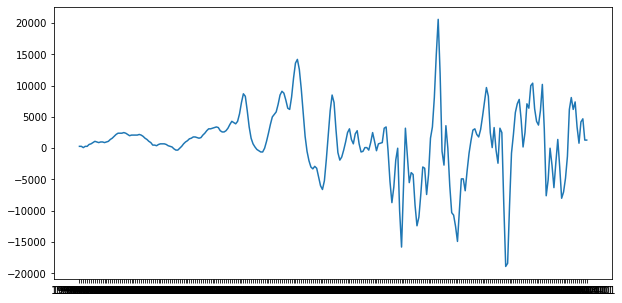

In [82]:
plt.figure(figsize=(10,5))
plt.plot(one_diff_second);

In [83]:
dftest = adfuller(one_diff_second)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.002667352703430322
Reject the null hypothesis. Data is stationary.



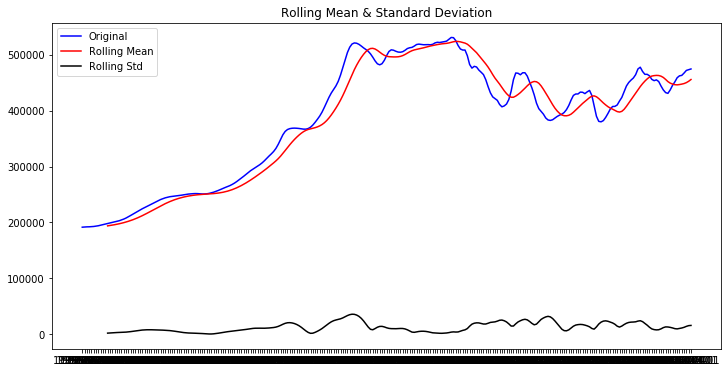

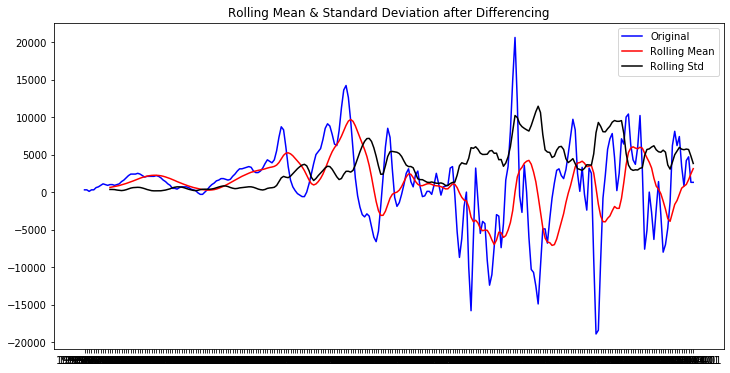

In [84]:
fig = plt.figure(figsize=(12,6))
plt.plot(second_zip.value, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

diff_roll_mean = one_diff_second.rolling(window=12, center=False).mean()
diff_roll_std = one_diff_second.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(one_diff_second, color='blue',label='Original')
plt.plot(diff_roll_mean, color='red', label='Rolling Mean')
plt.plot(diff_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after Differencing')
plt.show()

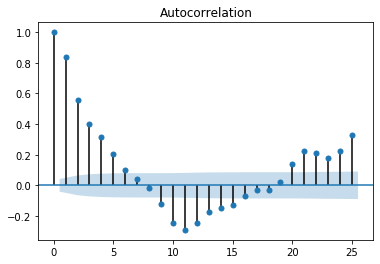

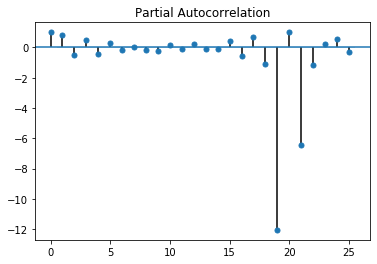

In [85]:
plot_acf(one_diff_second[:-1], alpha=0.5);
plot_pacf(one_diff_second[:-1], alpha=0.5);

### Third Zipcode: 6793

In [86]:
third_zip = state[state['Zipcode'] == state_zips[2]]
third_zip.drop(columns=['Zipcode'], inplace=True)
third_zip.head()

,value
time,
1996-04-01,280800.0
1996-05-01,282500.0
1996-06-01,284300.0
1996-07-01,286200.0
1996-08-01,288000.0


In [87]:
roll_mean = third_zip.rolling(window=12, center=False).mean()
roll_std = third_zip.rolling(window=12, center=False).std()

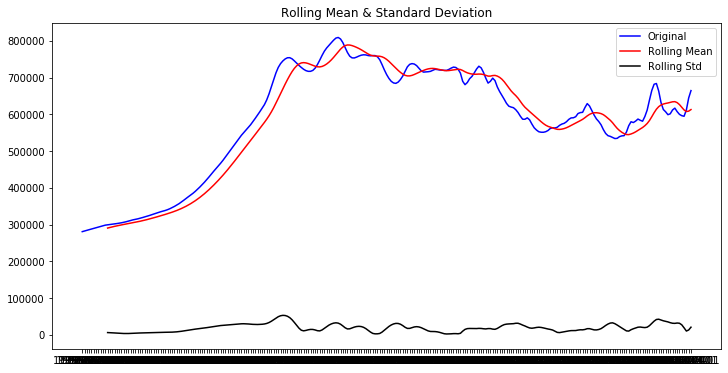

In [88]:
fig = plt.figure(figsize=(12,6))
plt.plot(third_zip.value, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [89]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(third_zip['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.21298196794972774
Fail to reject the null hypothesis. Data is not stationary.



In [90]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -2.181625
p-value                          0.212982
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [91]:
one_diff_third = third_zip['value'].diff().dropna()

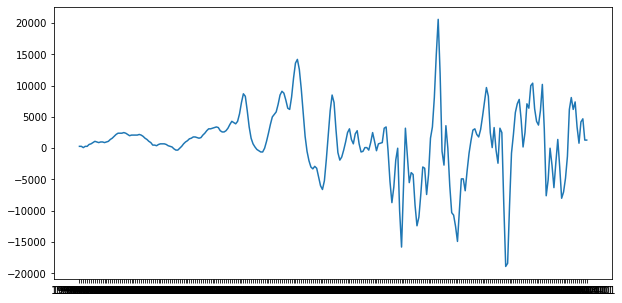

In [92]:
plt.figure(figsize=(10,5))
plt.plot(one_diff_second);

In [93]:
dftest = adfuller(one_diff_third)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.05830079208558181
Fail to reject the null hypothesis. Data is not stationary.



In [94]:
two_diff_third = one_diff_third.diff().dropna()

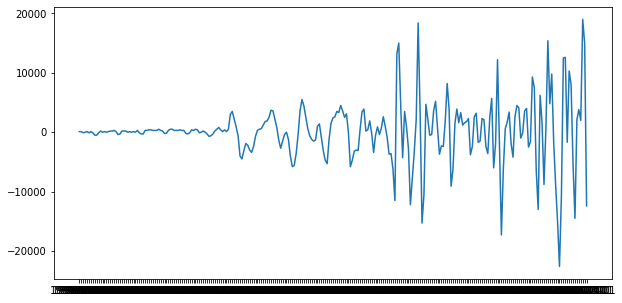

In [95]:
plt.figure(figsize=(10,5))
plt.plot(two_diff_third);

In [96]:
dftest = adfuller(two_diff_third)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 8.576750370540442e-09
Reject the null hypothesis. Data is stationary.



In [97]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -6.556789e+00
p-value                        8.576750e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


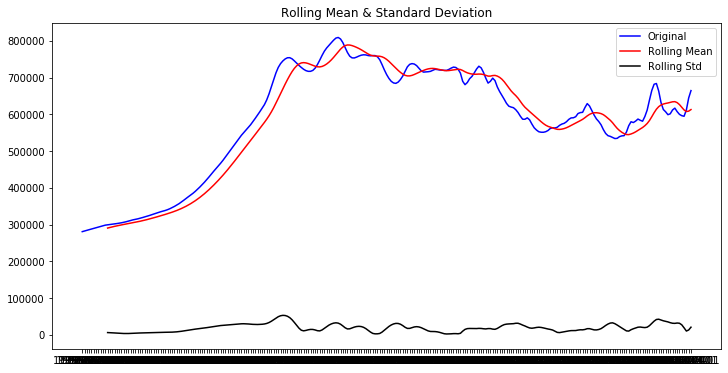

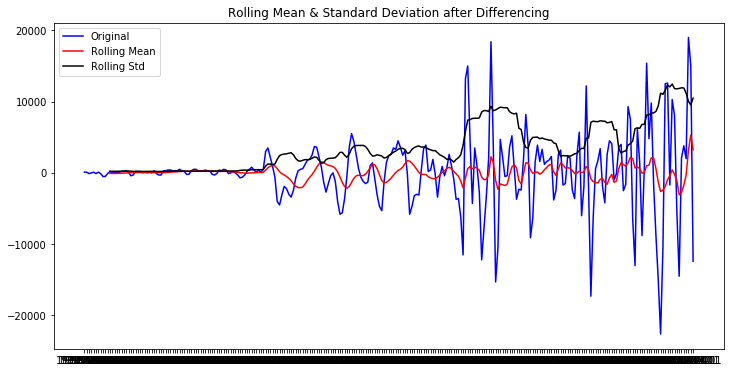

In [98]:
fig = plt.figure(figsize=(12,6))
plt.plot(third_zip.value, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

diff_roll_mean = two_diff_third.rolling(window=12, center=False).mean()
diff_roll_std = two_diff_third.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(two_diff_third, color='blue',label='Original')
plt.plot(diff_roll_mean, color='red', label='Rolling Mean')
plt.plot(diff_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after Differencing')
plt.show()

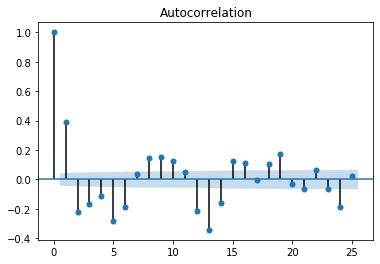

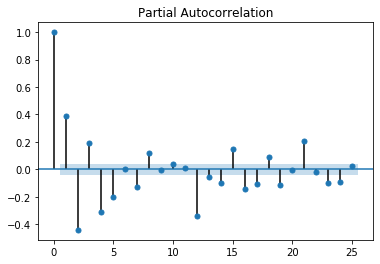

In [99]:
plot_acf(two_diff_third[:-1], alpha=0.5);
plot_pacf(two_diff_third[:-1], alpha=0.5);

## Modeling

In [100]:
global summary_df
summary_df = pd.DataFrame(columns = ['Zip', 'Order', 'AIC', 'BIC', 'test_mse', 'test_rmse'])
summary_df

,Zip,Order,AIC,BIC,test_mse,test_rmse


### First Zipcode: 6820

In [101]:
from numpy import linalg as LA
LinAlgError = np.linalg.LinAlgError

In [104]:
orders = [(1, 0, 0), (1, 1, 0), (2, 1, 3), (3, 1, 1), (2, 2, 2), (4, 1, 1), (3, 2, 3), (3, 2, 1), (3, 2, 2), (1, 0, 1),
         (4, 1, 1)] 

def train_test(df):
    train = df[:'2015-04']
    test = df['2015-05':]
    return train, test

def model_build(zipcode, df, orders):
    train, test = train_test(df)
    for i in orders:
#         print(i)
        try:
            zip_ = zipcode
            order = i
            model = ARIMA(train, order=i)
            fitted = model.fit(disp=-1)
            test_fc, se, conf = fitted.forecast(36, alpha=0.05)
            aic = round(fitted.aic, 2)
            bic = round(fitted.bic, 2)
            test_mse = round(mean_squared_error(test.values, test_fc), 2)
            test_rmse = round(np.sqrt(test_mse), 2)
            global summary_df
            summary_df = summary_df.append({'Zip': zip_, 'Order': str(order), 
                                                      'AIC': aic, 'BIC': bic,
                                                      'test_mse': test_mse, 
                                                      'test_rmse': test_rmse},
                                                     ignore_index=True)
        except (LinAlgError, ValueError):
            continue
        
    return summary_df

In [105]:
model_build('first', first_zip, orders)
model_build('second', second_zip, orders)
model_build('third', third_zip, orders)

,Zip,Order,AIC,BIC,test_mse,test_rmse
0,first,"(1, 0, 0)",4767.32,4777.60,1.083176e+08,10407.57
1,first,"(1, 1, 0)",4210.57,4220.85,2.392613e+08,15468.07
2,first,"(2, 1, 3)",4025.25,4049.23,7.598933e+08,27566.16
3,first,"(3, 1, 1)",4078.27,4098.82,4.000931e+08,20002.33
4,first,"(2, 2, 2)",4017.19,4037.71,1.979462e+10,140693.35
5,first,"(4, 1, 1)",4078.86,4102.83,4.838971e+08,21997.66
6,first,"(3, 2, 3)",4009.38,4036.75,2.419662e+09,49190.06
7,first,"(3, 2, 1)",4066.54,4087.06,8.557110e+09,92504.65
8,first,"(3, 2, 2)",4009.45,4033.39,8.755566e+09,93571.18
9,first,"(4, 1, 1)",4078.86,4102.83,4.838971e+08,21997.66


In [106]:
first_zip_models = summary_df[summary_df['Zip'] == 'first']
second_zip_models = summary_df[summary_df['Zip'] == 'second'] 
third_zip_models = summary_df[summary_df['Zip'] == 'third'] 

## Evaluating Models

### First Zipcode: 6820

In [107]:
first_zip_models

,Zip,Order,AIC,BIC,test_mse,test_rmse
0,first,"(1, 0, 0)",4767.32,4777.60,1.083176e+08,10407.57
1,first,"(1, 1, 0)",4210.57,4220.85,2.392613e+08,15468.07
2,first,"(2, 1, 3)",4025.25,4049.23,7.598933e+08,27566.16
3,first,"(3, 1, 1)",4078.27,4098.82,4.000931e+08,20002.33
4,first,"(2, 2, 2)",4017.19,4037.71,1.979462e+10,140693.35
5,first,"(4, 1, 1)",4078.86,4102.83,4.838971e+08,21997.66
6,first,"(3, 2, 3)",4009.38,4036.75,2.419662e+09,49190.06
7,first,"(3, 2, 1)",4066.54,4087.06,8.557110e+09,92504.65
8,first,"(3, 2, 2)",4009.45,4033.39,8.755566e+09,93571.18
9,first,"(4, 1, 1)",4078.86,4102.83,4.838971e+08,21997.66


In [108]:
first_zip_models.sort_values('AIC', axis=0, ascending=True)[:3]

,Zip,Order,AIC,BIC,test_mse,test_rmse
6,first,"(3, 2, 3)",4009.38,4036.75,2.419662e+09,49190.06
8,first,"(3, 2, 2)",4009.45,4033.39,8.755566e+09,93571.18
4,first,"(2, 2, 2)",4017.19,4037.71,1.979462e+10,140693.35


In [109]:
first_zip_models.sort_values('test_rmse', axis=0, ascending=True)[:3]

,Zip,Order,AIC,BIC,test_mse,test_rmse
0,first,"(1, 0, 0)",4767.32,4777.60,1.083176e+08,10407.57
1,first,"(1, 1, 0)",4210.57,4220.85,2.392613e+08,15468.07
3,first,"(3, 1, 1)",4078.27,4098.82,4.000931e+08,20002.33


In [132]:
def best_model(df, order=(0,0,0)):
    train, test = train_test(df)
#     print(test)
    no1_model = ARIMA(train, order=order)
    best_fit = no1_model.fit()
    test_fc, se, conf = best_fit.forecast(36, alpha=0.05)
    # Make as pandas series
    fc_series = pd.Series(test_fc, index=test.index)
    print(fc_series)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)
    print(best_fit.summary())
    print('\n')
    print('\n')
    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

time
2015-05-01    1.374025e+06
2015-06-01    1.370607e+06
2015-07-01    1.368272e+06
2015-08-01    1.366850e+06
2015-09-01    1.364817e+06
2015-10-01    1.362767e+06
2015-11-01    1.360468e+06
2015-12-01    1.358275e+06
2016-01-01    1.356025e+06
2016-02-01    1.353820e+06
2016-03-01    1.351566e+06
2016-04-01    1.349316e+06
2016-05-01    1.347034e+06
2016-06-01    1.344747e+06
2016-07-01    1.342438e+06
2016-08-01    1.340118e+06
2016-09-01    1.337780e+06
2016-10-01    1.335429e+06
2016-11-01    1.333061e+06
2016-12-01    1.330678e+06
2017-01-01    1.328280e+06
2017-02-01    1.325867e+06
2017-03-01    1.323438e+06
2017-04-01    1.320994e+06
2017-05-01    1.318534e+06
2017-06-01    1.316059e+06
2017-07-01    1.313569e+06
2017-08-01    1.311064e+06
2017-09-01    1.308543e+06
2017-10-01    1.306007e+06
2017-11-01    1.303456e+06
2017-12-01    1.300889e+06
2018-01-01    1.298307e+06
2018-02-01    1.295710e+06
2018-03-01    1.293098e+06
2018-04-01    1.290470e+06
dtype: float64
        

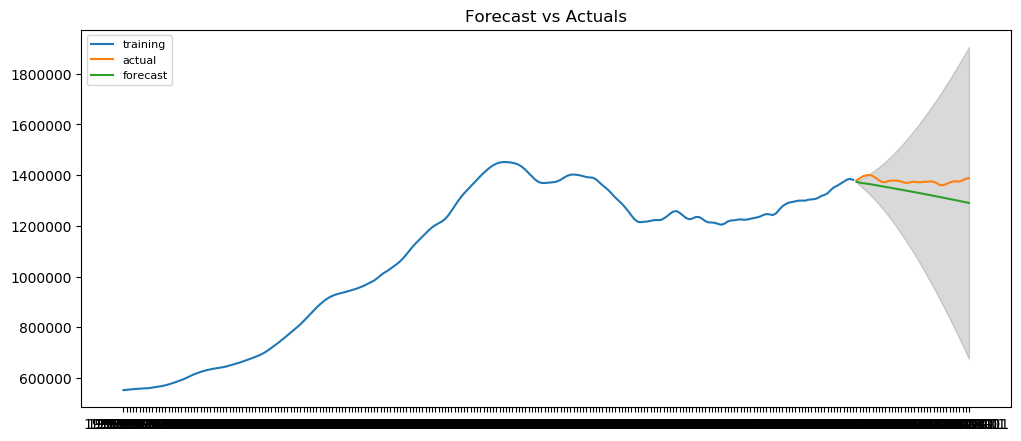

In [133]:
best_model(first_zip, order=(3, 2, 3))

### Second Zipcode: 6068

In [122]:
second_zip_models

,Zip,Order,AIC,BIC,test_mse,test_rmse
10,second,"(1, 0, 0)",4574.12,4584.41,4.064573e+09,63754.00
11,second,"(1, 1, 0)",4247.63,4257.91,6.173306e+08,24846.14
12,second,"(2, 1, 3)",4060.97,4084.94,8.149433e+08,28547.21
13,second,"(3, 1, 1)",4085.34,4105.89,5.097980e+08,22578.71
14,second,"(2, 2, 2)",4070.88,4091.40,1.626711e+10,127542.58
15,second,"(4, 1, 1)",4071.79,4095.77,3.032501e+08,17414.08
16,second,"(3, 2, 3)",4046.56,4073.92,4.082274e+09,63892.67
17,second,"(3, 2, 1)",4078.70,4099.23,2.018174e+10,142062.45
18,second,"(3, 2, 2)",4065.32,4089.26,9.835367e+09,99173.42
19,second,"(4, 1, 1)",4071.79,4095.77,3.032501e+08,17414.08


In [123]:
second_zip_models.sort_values('AIC', axis=0, ascending=True)[:3]

,Zip,Order,AIC,BIC,test_mse,test_rmse
16,second,"(3, 2, 3)",4046.56,4073.92,4.082274e+09,63892.67
12,second,"(2, 1, 3)",4060.97,4084.94,8.149433e+08,28547.21
18,second,"(3, 2, 2)",4065.32,4089.26,9.835367e+09,99173.42


In [124]:
second_zip_models.sort_values('test_rmse', axis=0, ascending=True)[:3]

,Zip,Order,AIC,BIC,test_mse,test_rmse
15,second,"(4, 1, 1)",4071.79,4095.77,3.032501e+08,17414.08
19,second,"(4, 1, 1)",4071.79,4095.77,3.032501e+08,17414.08
13,second,"(3, 1, 1)",4085.34,4105.89,5.097980e+08,22578.71


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  227
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -2028.896
Method:                       css-mle   S.D. of innovations           1827.529
Date:                Wed, 06 May 2020   AIC                           4071.792
Time:                        14:38:53   BIC                           4095.767
Sample:                    05-01-1996   HQIC                          4081.466
                         - 03-01-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1030.8901    793.701      1.299      0.194    -524.735    2586.515
ar.L1.D.value     1.6246      0.114     14.269      0.000       1.401       1.848
ar.L2.D.value    -1.4450      0.183     

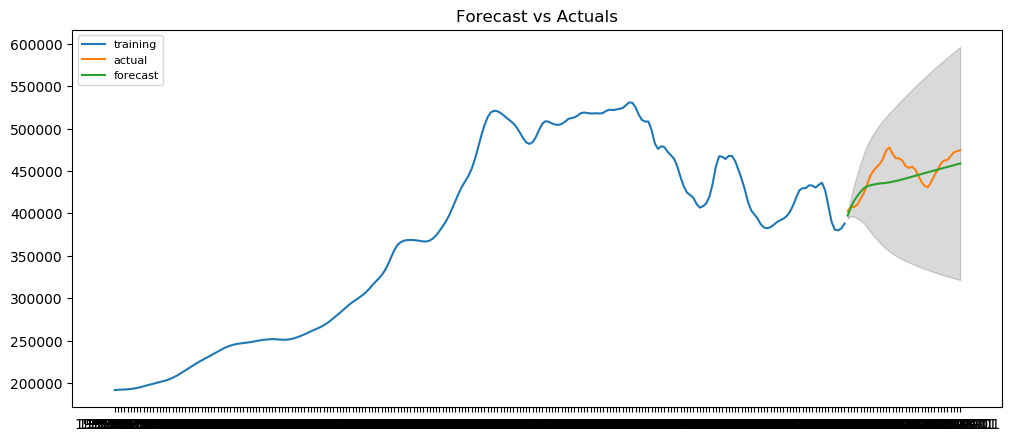

In [125]:
best_model(second_zip, order=(4, 1, 1))

### Third Zipcode: 6793